In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X.shape)
print (X_train.shape)
print (X_test.shape)

(150, 4)
(112, 4)
(38, 4)


In [4]:
from sklearn.linear_model import LogisticRegression


In [5]:
logreg= LogisticRegression(solver='lbfgs',multi_class= 'auto', max_iter=1000)
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)


0.9736842105263158

crossValidation modeli değerlendirmek için kullanılır biz şuan  modeli train ve test olarak ayırdık, hedef değişkene göre regression uyguladık. şuan değerlendirme aşamasındayız.overfitting den kurtulmak için train ve test split olarak ikiye ayrılır. eğitim verisi üzerinde model kurulur ve daha önce görmediği test verisi üzerinde değerlendirilir.crossvalidation modelin performansını değerlendirmek için kullanılan istatistiksel bir metoddur.crossvalidation da veri hızlı şekilde parçalanır ve çoklu modeller eğitilir bu tekniğin en genel kullanılan versiyonu k-fold crossValidationdur. burada k belirli bir sayıdır örneğin 5fold dersek 5 eşit parçaya ayrılır. her fold test seti ayrılana kadar model devam eder. bu şekilde her bir split için  doğrulama skoru bulunur.

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
scores= cross_val_score(logreg , X,y,cv=5)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [8]:
scores.mean()


0.9733333333333334

crossvalidation faydaları: train tet split ragele parçalama yapıyor. bu rasgele parçalama çok sağlıklı bir bölme olmayacaktır. şans eseri test set olarak aldığımız parça modelin performansını düşük gösterebilir fakat crossvalidation kullanarak her bir parça için score değerleri hesaplanacak ve bu değerlerigörerek modelin performansını daha iyi görebileceğiz. dez avantajı: hesaplama süresinin fazla olmasıdır. crossvalidation ile bir model eğitmek yerine k tane model eğitildiğinden dolayı zaman alır.

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
import sys
!{sys.executable} -m pip install mglearn



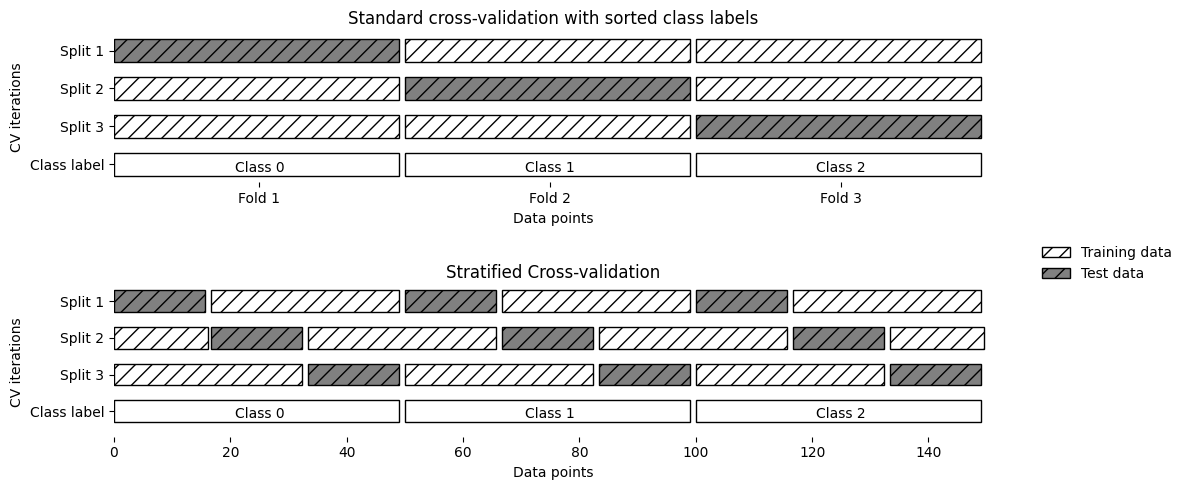

In [13]:
import mglearn
mglearn.plots.plot_stratified_cross_validation()

In [14]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([0.98, 0.96, 0.96])

In [15]:
from sklearn.model_selection import LeaveOneOut
loo= LeaveOneOut()
scores = cross_val_score (logreg,iris.data,iris.target,cv=loo)
scores.mean()

0.9666666666666667

LeaveOneOut çapraz doğrulama stratejisi, veri kümesindeki her bir örnek için bir döngü oluşturur ve her döngüde bir örnek dışındaki tüm veriyi eğitim için kullanır, ardından dışarıda bırakılan tek örnekle modeli değerlendirir. Bu süreç, veri kümesindeki her örnek için bir kez tekrarlanır.

örneğin veri setinde aynı hastaya ait bir çok veri olabilir eğer eğitim ve test verileri için tabakalı seçim yaparsak muhtemelen aynı kişilerin verileri bir yerde toplanacak ve bu şekilde kurulan model sağlıklı olmayacak. bu pronlem için grup kfold tekiniği kullanacağız. argüman olarak grupların dizisini alır.